<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8%EB%A7%81_%EC%A0%95%EB%8B%B5%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,\
GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,\
learning_curve

sns.set(style='white', context='notebook', palette='deep')

1. 데이터를 로드해라

In [19]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/타이타닉/test.csv')

* 본 이상치 탐지법은 Tukey 방법에 따라 사용자가 지정한 n개 이상의 특이치를 포함하는 관측치를 골라내는 함수를 작성할 것이다.
  * detect_outliers 이름의 함수를 정의하라. 이때 들어가는 인수는 DataFrame이름, Outiler 갯수, 변수이름이다.
  * 각 변수로 부터 Q1, Q3 ,IQR = Q3 - Q1을 출력하는 변수를 위 Q1,Q3,IQR과 동일 한 이름으로 생성하라
  * outlier_step 이름에 IQR에 1.5를 곱해 outlier에 색출될 최소범위를 선택해라
  * Q1에서 outlier_step을 뺀 범위 또는 Q3에서 outlier를 더한 범위에 포함되는 index를 가져와 outlier_list_col에 저장하라
  * outlier_indices 리스트에 outlier_list_col을 extend해라
  * 모든 변수들이 위 extend 결과를 마치면, 이때 Counter 함수를 활용해 각 원소들이 몇번 반복됬는지 계산하여 outlier_indices에 덮어써라
  * outlier_indices 리스트의 값들을 outlier_indices 리스트에서 2개 이상의 이상치를 포함하고 있을때의 관측치를 선택하라. multiple_outliers에 저장하고 return해라


``` 
1. extend 함수는 리스트 끝에 반복되는 값이 리스트 일 경우 뒤에 붙여주는 역할을 함 
 -> 이떄 extend에 사용되는 리스트를 처음 지정하는 = [] 위치는 for문에 속해있으면 안된다. 조심할것!
2. 코드 예시에서는 np.percentile()을 사용했으나 Fare의 경우 결측(nan)이 존재하여 Q1, Q3결과가 nan으로 출력됨.
 -> np.nanpercentile() 으로 nan을 무시하고 출력하도록 함.
 3. Counter() 함수는 한 리스트 내에 동일한 값이 몇개 있는지 딕셔너리 형태로 출력해준다.
 4. Counter()함수로 만든 딕셔너리를 .items()로 가져오면 순서쌍으로 묶어준다. 따라서 for 문 내 두 개의 iterator를 사용하더라도 zip()을 안쓰고도 가져올 수 있게된다.
```


In [20]:
# 1차 시도 : 성공

================================================================================



In [21]:
def detect_outliers(df, n, features):
  outlier_indices = []
  for col in features :
    print("=========================")
    print("col name : ", col)
    Q1 = np.nanpercentile(df[col], 25)
    print("Q1 : ",Q1)
    Q3 = np.nanpercentile(df[col],75)
    print("Q3 : ",Q3)
    IQR = Q3 - Q1
    print("IQR : ",IQR)
    outlier_step = 1.5*IQR
    print("outlier_step : ",outlier_step)
    outlier_list_col = df[(df[col]<Q1 - outlier_step)|(df[col]>Q3+outlier_step)].index
    print("outlier_list_col : ",outlier_list_col)
    outlier_indices.extend(outlier_list_col)
    print("outlier_indices extend 전 :",outlier_indices)
  
  outlier_indices = Counter(outlier_indices)
  print("outlier_indices extend 후 :",outlier_indices)
  print("outlier_indices.items() : ",outlier_indices.items())
  multiple_outliers = list(k for k, v in outlier_indices.items() if v>n)
  print("multiple_outliers : ",multiple_outliers)
  return multiple_outliers

outliers_to_drop = detect_outliers(train,1,['Age','SibSp','Fare'])
print("출력 된 값은 ? : ",outliers_to_drop)

col name :  Age
Q1 :  20.125
Q3 :  38.0
IQR :  17.875
outlier_step :  26.8125
outlier_list_col :  Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')
outlier_indices extend 전 : [33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]
col name :  SibSp
Q1 :  0.0
Q3 :  1.0
IQR :  1.0
outlier_step :  1.5
outlier_list_col :  Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')
outlier_indices extend 전 : [33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851, 7, 16, 24, 27, 50, 59, 63, 68, 71, 85, 88, 119, 159, 164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824, 846, 850, 863]
col name :  Fare
Q1 :  7.9104
Q3 :  31.0
IQR :  23

In [74]:
def detect_outliers(df, n, features):
  outlier_indices = []
  for col in features :
    print("=========================")
    print("col name : ", col)
    Q1 = np.nanpercentile(df[col], 25)
    print("Q1 : ",Q1)
    Q3 = np.nanpercentile(df[col],75)
    print("Q3 : ",Q3)
    IQR = Q3 - Q1
    print("IQR : ",IQR)
    outlier_step = 1.5*IQR
    print("outlier_step : ",outlier_step)
    outlier_list_col = df[(df[col]<Q1 - outlier_step)|(df[col]>Q3+outlier_step)].index
    print("outlier_list_col : ",outlier_list_col)
    outlier_indices.extend(outlier_list_col)
    print("outlier_indices extend 전 :",outlier_indices)
  
  outlier_indices = Counter(outlier_indices)
  print("outlier_indices extend 후 :",outlier_indices)
  print("outlier_indices.items() : ",outlier_indices.items())
  multiple_outliers = list(k for k, v in outlier_indices.items() if v>n)
  print("multiple_outliers : ",multiple_outliers)
  return multiple_outliers

outliers_to_drop = detect_outliers(train,1,['Age','SibSp','Fare'])
print("출력 된 값은 ? : ",outliers_to_drop)

col name :  Age
Q1 :  20.125
Q3 :  38.0
IQR :  17.875
outlier_step :  26.8125
outlier_list_col :  Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')
outlier_indices extend 전 : [33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]
col name :  SibSp
Q1 :  0.0
Q3 :  1.0
IQR :  1.0
outlier_step :  1.5
outlier_list_col :  Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')
outlier_indices extend 전 : [33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851, 7, 16, 24, 27, 50, 59, 63, 68, 71, 85, 88, 119, 159, 164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824, 846, 850, 863]
col name :  Fare
Q1 :  7.9104
Q3 :  31.0
IQR :  23

In [22]:
# 예제와 결과를 맞춰주기 위해 제거함.
del outliers_to_drop[0]

outliers_to_drop에 해당되는 index를 이용해 train에서 출력해봐라

In [23]:
train.iloc[outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


* outliers_to_drop에 해당하는 index를 train에서 삭제하고 index를 다시 정렬해라

In [24]:
train.drop(outliers_to_drop, axis=0).reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


* train의 행 갯수를 train_len에 저장하라
* train, test 셋 결합해라

In [31]:
train_len=len(train)

dataset = pd.concat([train,test], axis=0).reset_index(drop=True)

* 결측값과 Null값 확인해라
  * 이때 NaN 을 NaN으로, 비어있는값을 NaN으로 바꾸어라
* train의 변수 타입을 확인하고 null이 얼마나 있는지 확인하라

In [33]:
dataset = dataset.fillna(np.nan)

dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

* dataset의 형태를 출력해라

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [51]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId', 'Pclass',
       'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [85]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


* ["Survived","SibSp","Parch","Age","Fare"]
* 위 변수들에 대해 corr matrix를 그려라
* 단, heatmap으로 그려야하며 각 셀에는 상관계수가 표기되어야 한다.

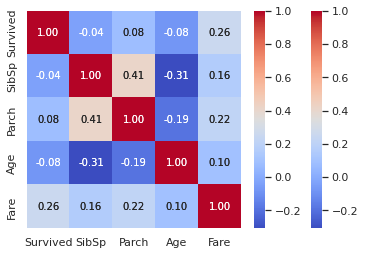

In [41]:
g = sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt = '.2f',cmap = 'coolwarm')
g = sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt = '.2f', cmap='coolwarm')

* Survived와 SibSp의 sns를 이용해 막대그래프를 그려라

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


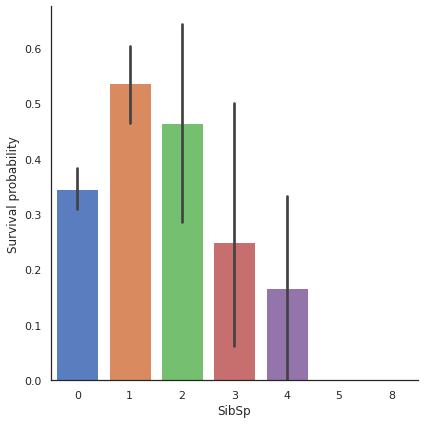

In [44]:
g = sns.factorplot(x = 'SibSp', y='Survived', data=train, kind = 'bar', size=6, palette='muted')
g = g.set_ylabels("Survival probability")

In [98]:
train[train['SibSp']==0].S

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,608.000000,608.000000,608.000000,471.000000,608.0,608.000000,608.000000
mean,455.370066,0.345395,2.351974,31.397558,0.0,0.185855,25.692028
std,255.992322,0.475888,0.824539,13.647767,0.0,0.585377,49.733052
min,3.000000,0.000000,1.000000,0.420000,0.0,0.000000,0.000000
25%,232.750000,0.000000,2.000000,22.000000,0.0,0.000000,7.795800
50%,461.500000,0.000000,3.000000,29.000000,0.0,0.000000,9.500000
75%,678.500000,1.000000,3.000000,39.000000,0.0,0.000000,26.000000
max,891.000000,1.000000,3.000000,80.000000,0.0,5.000000,512.329200


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


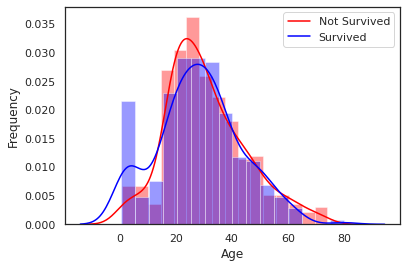

In [51]:
g = sns.distplot(train['Age'][(train['Survived']==0)&(train["Age"].notnull())],\
                color='Red')
g = sns.distplot(train['Age'][(train['Survived']==1)&(train['Age'].notnull())],\
                ax=g, color="Blue")
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

In [52]:
dataset['Fare'].isnull().sum()

1

* Fare 미싱값을 중앙값으로 대체해라
  * 필자는 예측에 예측에 중요한 영향을 주지 않는 중앙값으로 대체하였다.

In [53]:
dataset['Fare'] = dataset['Fare'].fillna(dataset["Fare"].median())

* skewness를 계산하고 Fare 분포를 그려봐라

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


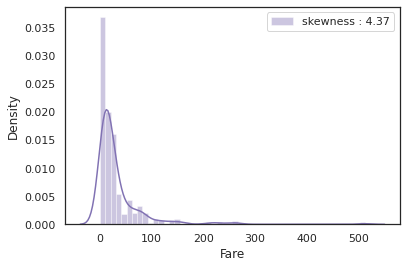

In [55]:
g = sns.distplot(train['Fare'], color="m", label="skewness : %.2f"%(dataset['Fare'].skew()))
g = g.legend(loc='best')

* 위 그래프를 보면 skew가 너무 심해 모델에 지나친 가중치를 이끈다. 따라서 log 함수로 skew를 줄여라

In [56]:
dataset["Fare"] = dataset['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

* 위의 Fare를 log를 취해 histogram을 그려봐라
* g.legend를 이용해 최적의 위치에 위치하는 옵션을 부여하라

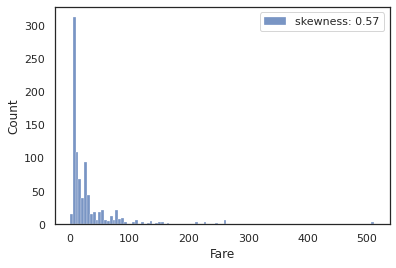

In [60]:
g = sns.histplot(train["Fare"], color="b", label="skewness: %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc = "best") # 계산하여 최적의 위치에 legend 위치하기

* 범주형 변수에 대한 barplot을 그려라.
* 이때 ylabel은 Survival Probability 로 입력해라

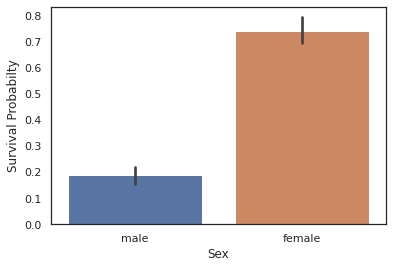

In [61]:
g = sns.barplot(x="Sex", y="Survived", data=train)
g = g.set_ylabel("Survival Probabilty")

* 성별 별 Survived에 대한 평균을 계산하라

In [63]:
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64